# 0. Import Packages

In [63]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [64]:
# !pip install yellowbrick

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# 1. EDA

In [66]:
seed = 84
np.random.seed(seed)
original_df = pd.read_csv("CensusCanada2016Training.csv")
df = original_df.copy(deep=True)

In [67]:
df.head().T

,0,1,2,3,4
Total Population,4051.00,2329.00,5276.00,5967.00,4236.00
Total Households,1441.00,1026.00,2071.00,2203.00,1419.00
Median Household Income (Current Year $),68242.12,88172.37,103853.38,82796.63,91648.22
Total Households For Period Of Construction,1441.00,1026.00,2071.00,2203.00,1419.00
Total Households For Period Of Construction Built Before 1961,323.00,927.00,3.00,133.00,0.00
Total Households For Period Of Construction Built Between 1961 And 1980,199.00,70.00,607.00,1695.00,7.00
Total Households For Period Of Construction Built Between 1981 And 190,53.00,15.00,567.00,248.00,127.00
Total Households For Period Of Construction Built Between 1991 And 2000,182.00,3.00,651.00,79.00,938.00
Total Households For Period Of Construction Built Between 2001 And 2005,526.00,0.00,106.00,0.00,143.00
Total Households For Structure Type Houses,911.00,792.00,1418.00,1397.00,914.00


In [68]:
df.columns

Index(['Total Population', 'Total Households',
       'Median Household Income (Current Year $)',
       'Total Households For Period Of Construction',
       'Total Households For Period Of Construction Built Before 1961',
       'Total Households For Period Of Construction Built Between 1961 And 1980',
       'Total Households For Period Of Construction Built Between 1981 And 190',
       'Total Households For Period Of Construction Built Between 1991 And 2000',
       'Total Households For Period Of Construction Built Between 2001 And 2005',
       'Total Households For Structure Type Houses',
       'Total Households For Structure Type Apartment, Building Low And High Rise',
       'Total Households For Structure Type Other Dwelling Types',
       'Total Households for Tenure', 'Dwellings by Tenure Owner',
       'Dwellings by Tenure Renter'],
      dtype='object')

In [69]:
new_col_names = ['Population',
                'Households',
                'Median_income',
                'HH_construction',
                'HH_before_1961',
                'HH_1961_1980',
                'HH_1981_1990',
                'HH_1991_2000',
                'HH_2001_2005',
                'HH_houses',
                'HH_apt_LH_rise',
                'HH_dwelling_other',
                'HH_tenure',
                'Dwellings_owner',
                'Dwellings_renter']

In [70]:
df.columns = new_col_names
df.head()

,Population,Households,Median_income,HH_construction,HH_before_1961,HH_1961_1980,HH_1981_1990,HH_1991_2000,HH_2001_2005,HH_houses,HH_apt_LH_rise,HH_dwelling_other,HH_tenure,Dwellings_owner,Dwellings_renter
0,4051,1441,68242.12,1441,323,199,53,182,526,911,525,5,1343,919,424
1,2329,1026,88172.37,1026,927,70,15,3,0,792,230,4,991,778,213
2,5276,2071,103853.38,2071,3,607,567,651,106,1418,652,1,1903,1522,381
3,5967,2203,82796.63,2203,133,1695,248,79,0,1397,806,0,2079,1272,807
4,4236,1419,91648.22,1419,0,7,127,938,143,914,505,0,1348,1186,162


In [71]:
df.shape

(5000, 15)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Population         5000 non-null   int64  
 1   Households         5000 non-null   int64  
 2   Median_income      5000 non-null   float64
 3   HH_construction    5000 non-null   int64  
 4   HH_before_1961     5000 non-null   int64  
 5   HH_1961_1980       5000 non-null   int64  
 6   HH_1981_1990       5000 non-null   int64  
 7   HH_1991_2000       5000 non-null   int64  
 8   HH_2001_2005       5000 non-null   int64  
 9   HH_houses          5000 non-null   int64  
 10  HH_apt_LH_rise     5000 non-null   int64  
 11  HH_dwelling_other  5000 non-null   int64  
 12  HH_tenure          5000 non-null   int64  
 13  Dwellings_owner    5000 non-null   int64  
 14  Dwellings_renter   5000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 586.1 KB


In [73]:
df.describe()

,Population,Households,Median_income,HH_construction,HH_before_1961,HH_1961_1980,HH_1981_1990,HH_1991_2000,HH_2001_2005,HH_houses,HH_apt_LH_rise,HH_dwelling_other,HH_tenure,Dwellings_owner,Dwellings_renter
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4866.967400,1927.776200,77241.071536,1927.776200,386.510600,555.437800,260.48240,237.92820,138.595600,1134.79180,777.188400,15.796000,1810.954800,1182.21140,628.155800
std,2491.841571,974.811432,33371.567357,974.811432,416.908471,448.327845,257.86717,265.43332,221.809214,812.09222,891.021549,62.949187,897.938845,710.51703,594.295093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3289.750000,1333.750000,53040.835000,1333.750000,47.000000,192.000000,74.00000,58.00000,17.000000,534.00000,146.000000,0.000000,1258.000000,687.00000,201.000000
50%,4655.000000,1825.000000,76206.780000,1825.000000,238.000000,470.000000,181.00000,143.00000,52.000000,1076.00000,487.000000,2.000000,1724.500000,1112.00000,456.000000
75%,6233.750000,2428.250000,95438.495000,2428.250000,613.000000,830.000000,369.00000,325.00000,157.000000,1592.00000,1119.000000,6.000000,2281.250000,1570.00000,879.000000
max,30789.000000,15388.000000,669559.560000,15388.000000,2411.000000,3547.000000,1740.00000,2360.00000,2262.000000,9123.00000,15248.000000,1378.000000,11891.000000,8628.00000,6813.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

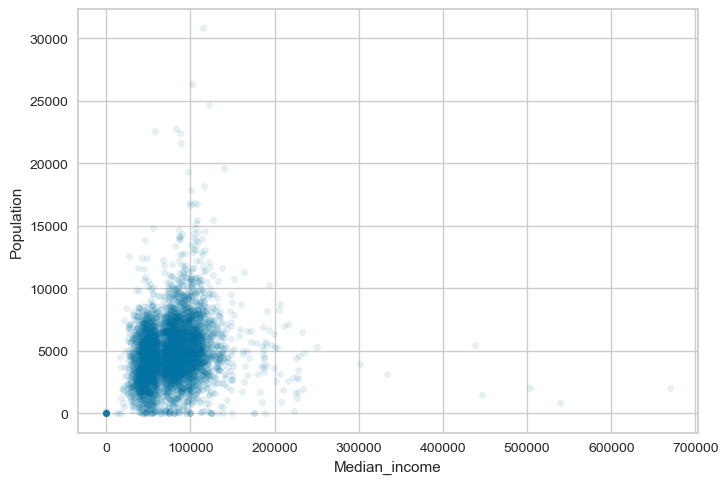

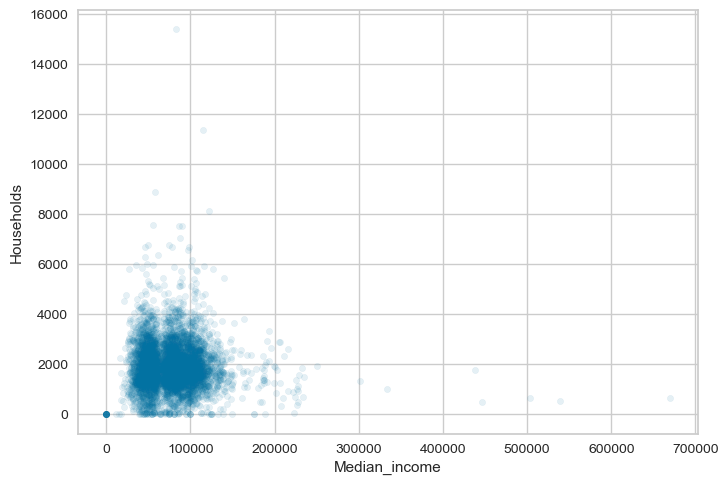

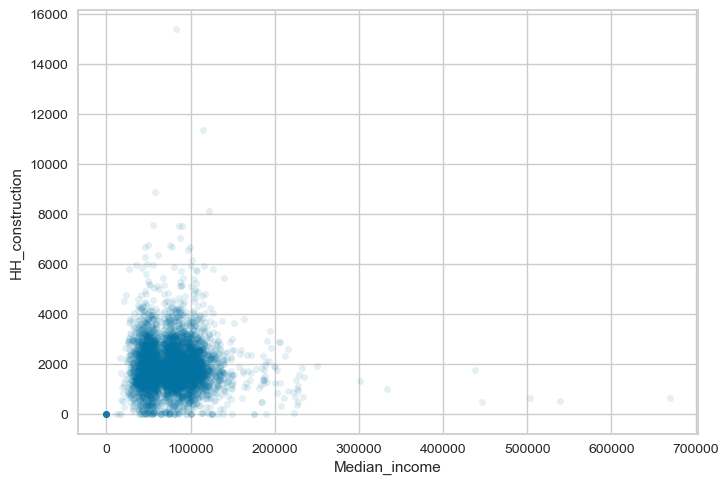

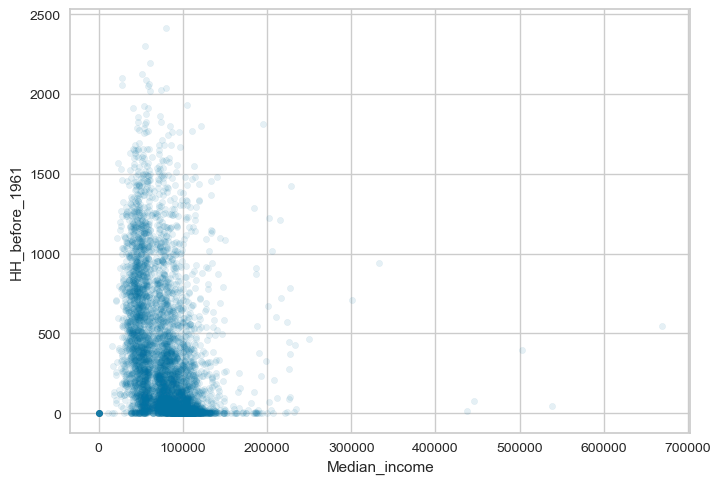

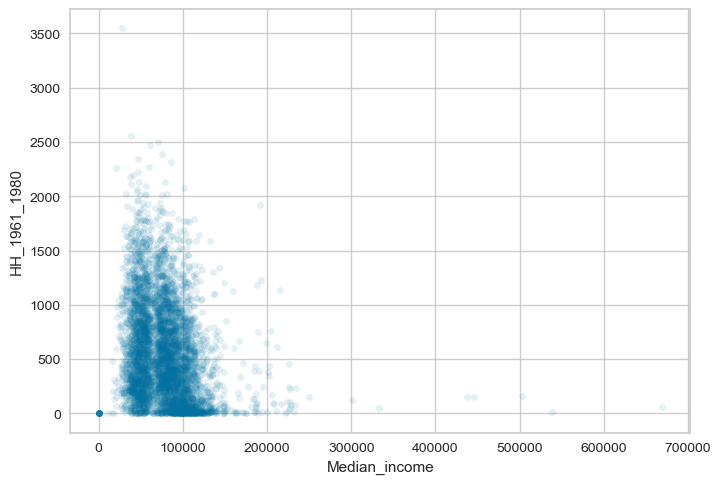

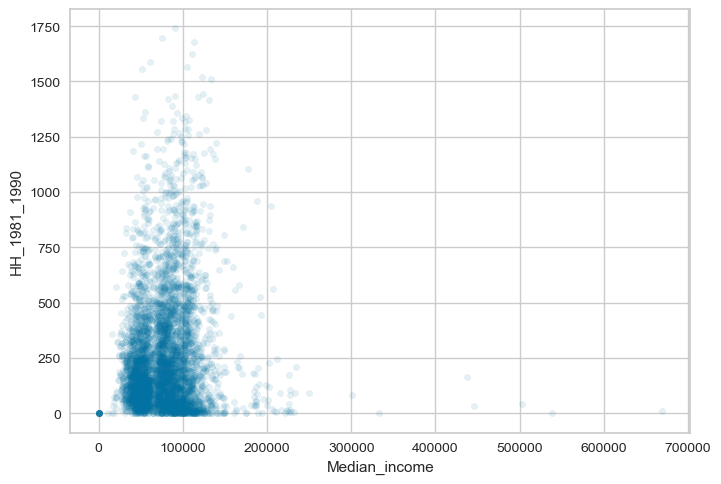

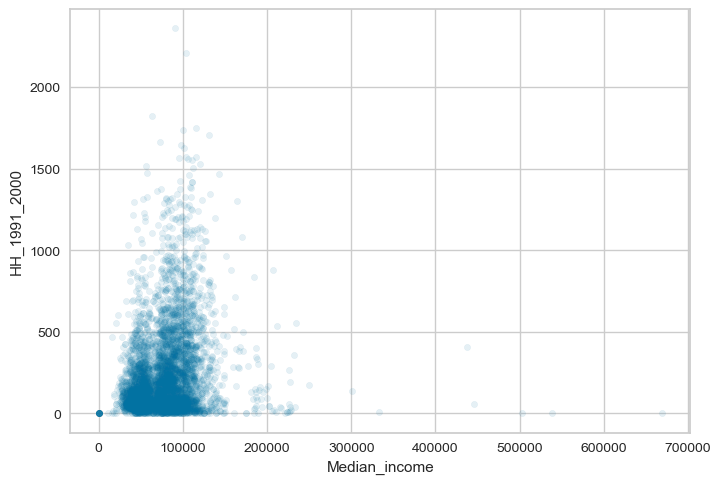

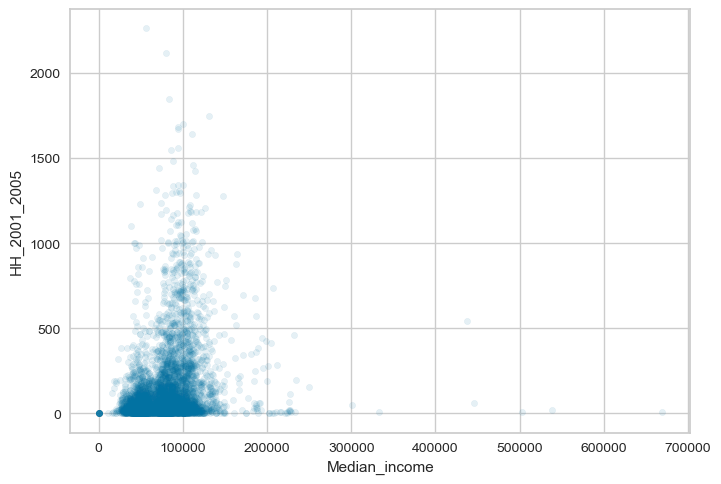

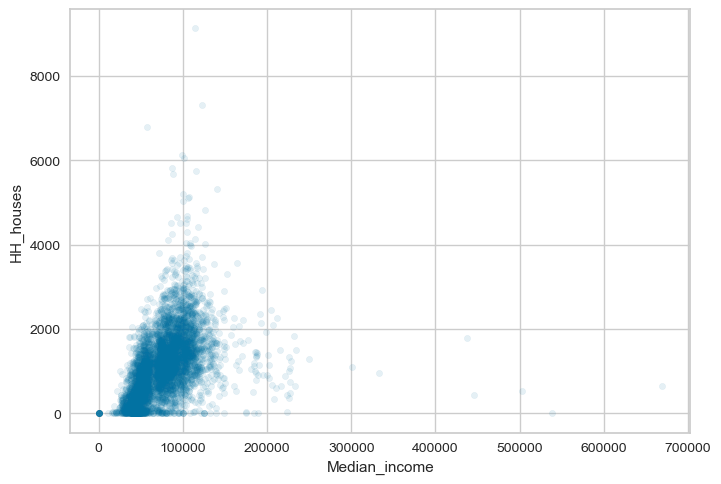

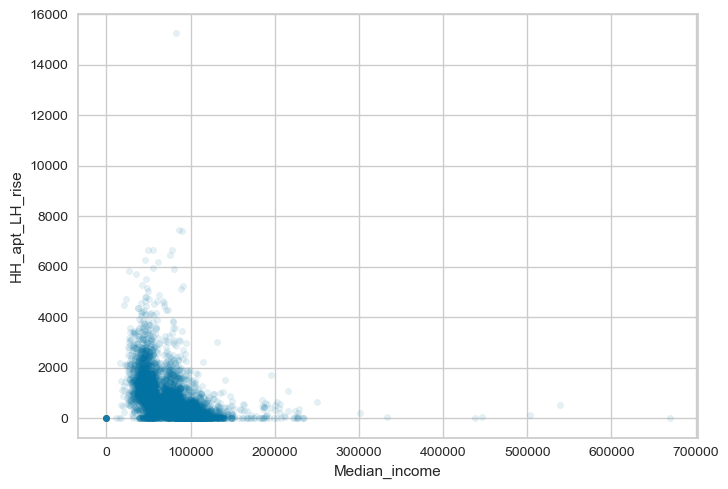

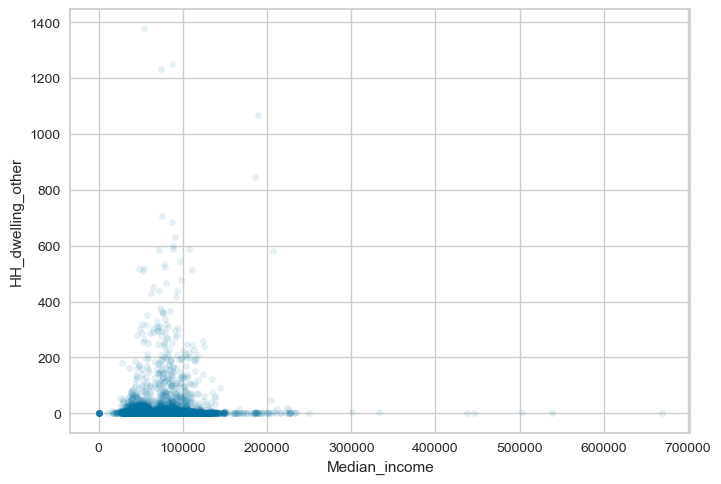

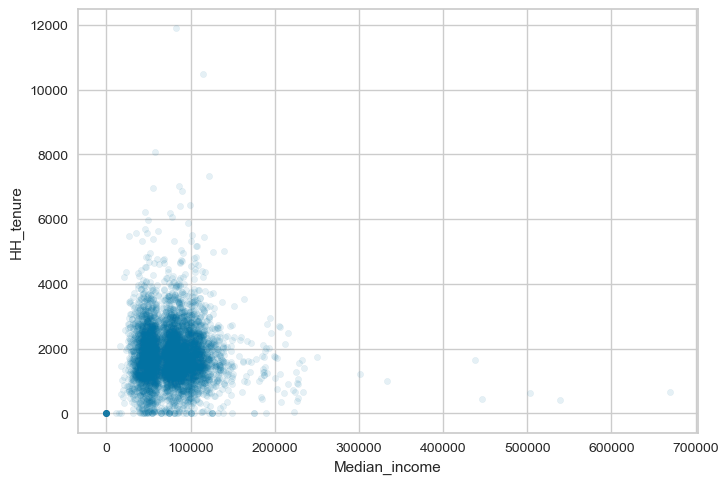

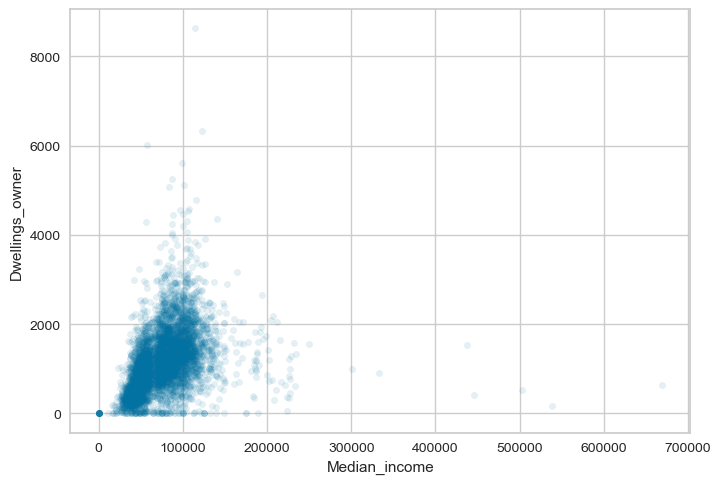

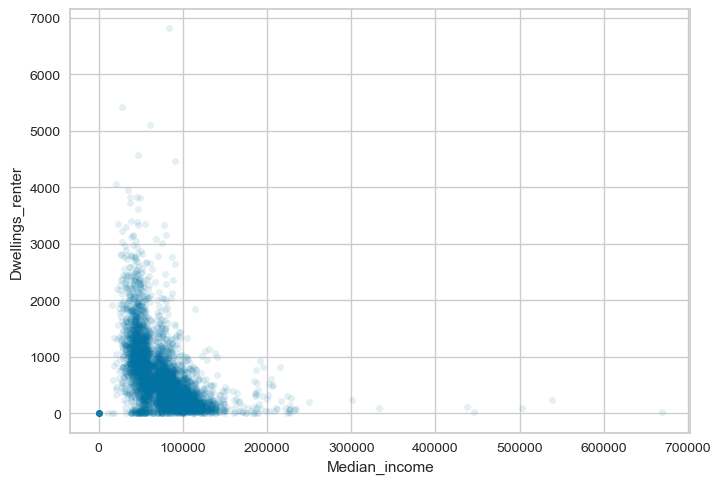

In [74]:
for column in df.columns:
    if column != 'Median_income':
        df.plot(kind = "scatter", x = 'Median_income', y = column, alpha=0.1)

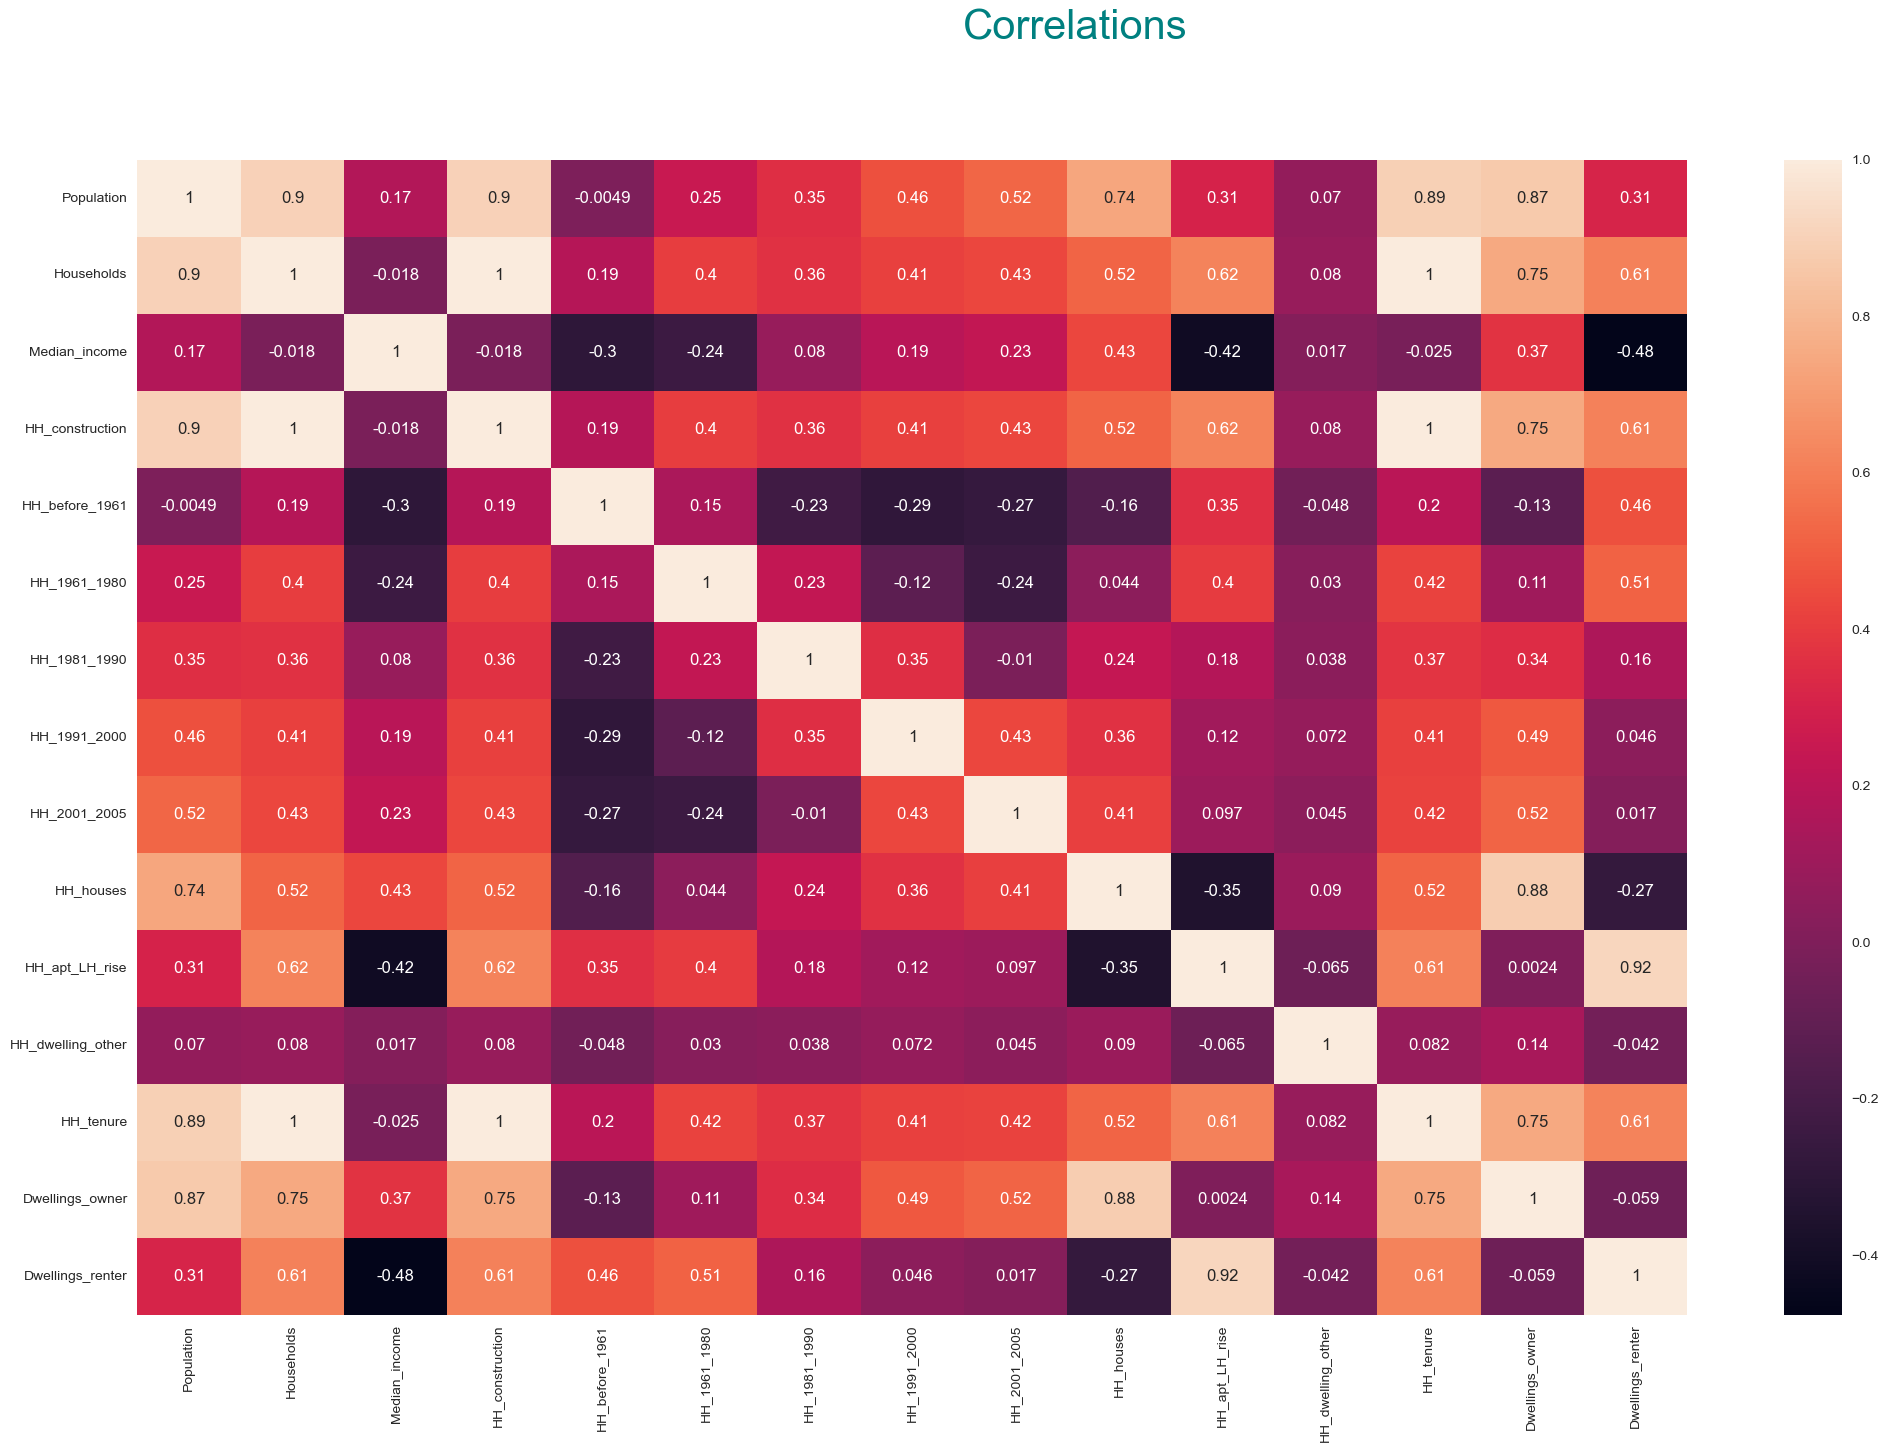

In [75]:
# correlation heatmap
plt.figure(figsize=(25, 15))
plt.suptitle('Correlations', fontsize = 30, color= 'teal')
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Population', ylabel='Households'>

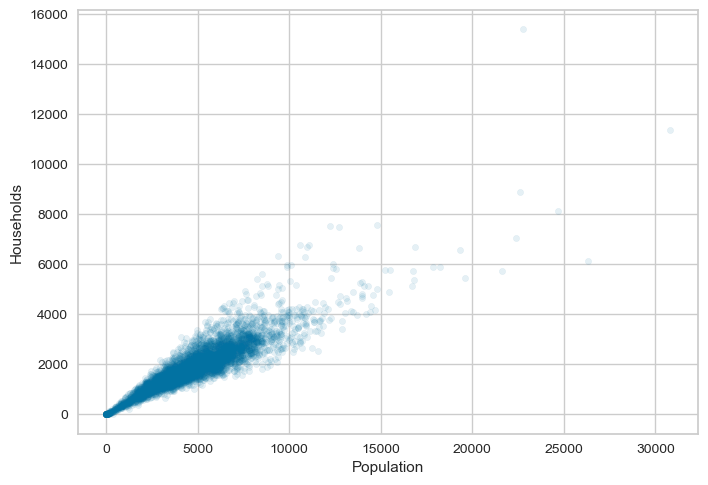

In [76]:
df.plot('Population', "Households", kind='scatter', alpha=0.1)

<AxesSubplot:>

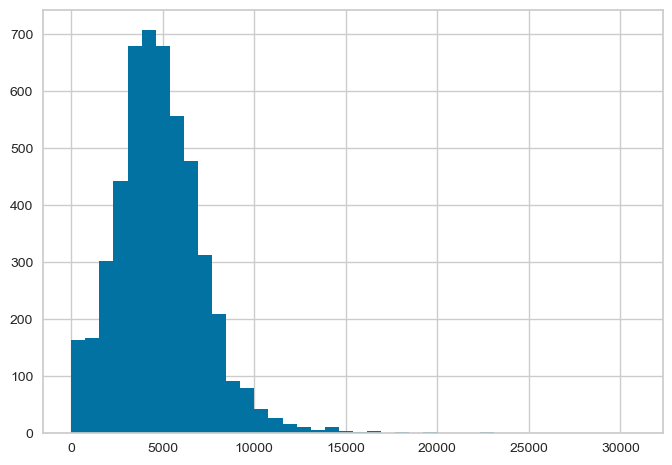

In [77]:
df['Population'].hist(bins=40)

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'Median_income'}>,
        <AxesSubplot:title={'center':'HH_before_1961'}>],
       [<AxesSubplot:title={'center':'HH_1961_1980'}>,
        <AxesSubplot:title={'center':'HH_1981_1990'}>,
        <AxesSubplot:title={'center':'HH_1991_2000'}>,
        <AxesSubplot:title={'center':'HH_2001_2005'}>],
       [<AxesSubplot:title={'center':'HH_houses'}>,
        <AxesSubplot:title={'center':'HH_apt_LH_rise'}>,
        <AxesSubplot:title={'center':'HH_dwelling_other'}>,
        <AxesSubplot:title={'center':'HH_tenure'}>],
       [<AxesSubplot:title={'center':'Dwellings_owner'}>,
        <AxesSubplot:title={'center':'Dwellings_renter'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

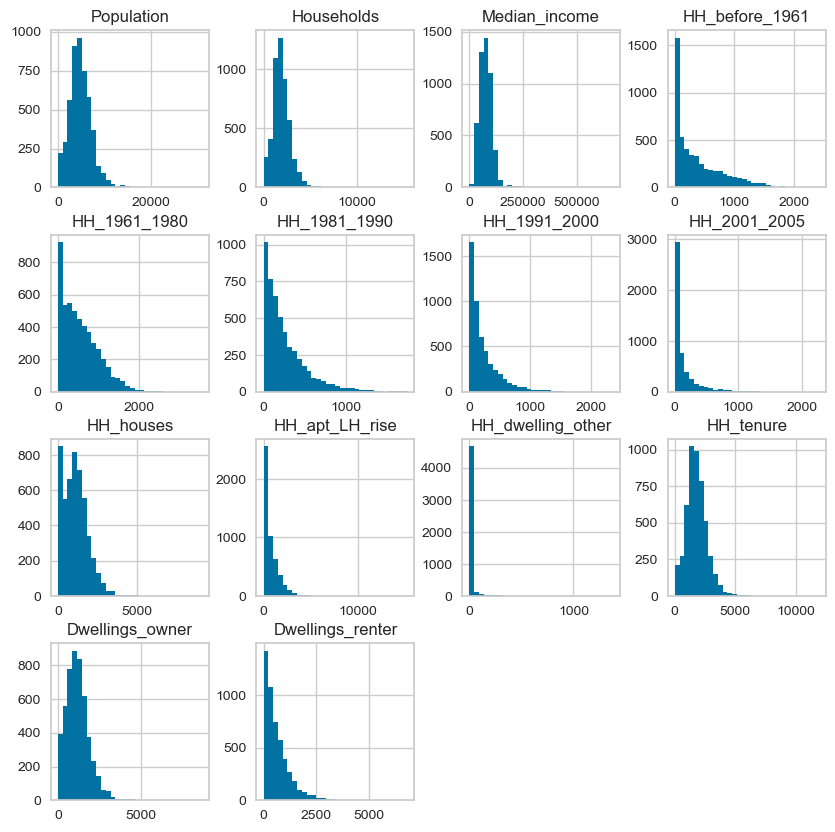

In [78]:
df[['Population',
                'Households',
                'Median_income',
                'HH_before_1961',
                'HH_1961_1980',
                'HH_1981_1990',
                'HH_1991_2000',
                'HH_2001_2005',
                'HH_houses',
                'HH_apt_LH_rise',
                'HH_dwelling_other',
                'HH_tenure',
                'Dwellings_owner',
                'Dwellings_renter']].hist(bins=30, sharex=False, sharey=False, xlabelsize=10, ylabelsize=10, figsize=(10,10))

In [79]:
df[df['Population']<500]

,Population,Households,Median_income,HH_construction,HH_before_1961,HH_1961_1980,HH_1981_1990,HH_1991_2000,HH_2001_2005,HH_houses,HH_apt_LH_rise,HH_dwelling_other,HH_tenure,Dwellings_owner,Dwellings_renter
36,384,98,54750.00,98,3,29,17,23,9,73,0,25,101,75,11
62,41,22,54083.50,22,0,0,0,14,4,22,0,0,21,5,0
78,330,125,85909.09,125,3,33,25,27,11,110,10,5,119,119,0
98,3,2,100000.00,2,0,1,0,0,0,2,0,0,6,5,1
156,260,123,31356.32,123,83,12,0,11,16,24,99,0,125,38,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,172,48,75000.00,48,15,14,5,4,2,34,14,0,0,0,0
4800,2,1,47045.32,1,1,0,0,0,0,0,0,1,1,0,1
4922,20,8,80000.00,8,2,3,1,1,0,8,0,0,8,5,3
4962,341,95,119851.93,95,0,21,16,32,0,90,5,0,90,60,20


# 2. Feature Engineering

In [80]:
# average household size, drop construction, percentages for periods, percentage for types
# Total Households NOT for Tenure
# percentages for owner and renter

In [81]:
# drop rows with households equal 0. 
df.drop(df[df['Households']==0].index, inplace=True)

In [82]:
# df['Avg_HH_size'] = df['Population']/df['Households']

# df['Pctg_before_1961'] = df['HH_before_1961']/df['Households']
# df['Pctg_1961_1980'] = df['HH_1961_1980']/df['Households']
# df['Pctg_1981_1990'] = df['HH_1981_1990']/df['Households']
# df['Pctg_1991_2000'] = df['HH_1991_2000']/df['Households']
# df['Pctg_2001_2005'] = df['HH_2001_2005']/df['Households']

# df['Pctg_house'] = df['HH_houses']/df['Households']
# df['Pctg_apt_LH_rise'] = df['HH_apt_LH_rise']/df['Households']
# df['Pctg_dwelling_other'] = df['HH_dwelling_other']/df['Households']

# df['Pctg_not_tenure'] = 1-df['HH_tenure']/df['Households']
# df['Pctg_owner'] = df['Dwellings_owner']/df['HH_tenure']
# df['Pctg_renter'] = df['Dwellings_renter']/df['HH_tenure']

In [83]:
# clean nan in rows with HH_tenure.
# df.loc[np.isnan(df['Pctg_owner']), ['Pctg_owner', 'Pctg_renter']] = 0

In [84]:
# drop HH_construction because it's the same as households
dropped_columns = ['HH_construction', 'Population',
                  'HH_tenure']
df.drop(columns=dropped_columns, inplace=True)

In [85]:
df.head()

,Households,Median_income,HH_before_1961,HH_1961_1980,HH_1981_1990,HH_1991_2000,HH_2001_2005,HH_houses,HH_apt_LH_rise,HH_dwelling_other,Dwellings_owner,Dwellings_renter
0,1441,68242.12,323,199,53,182,526,911,525,5,919,424
1,1026,88172.37,927,70,15,3,0,792,230,4,778,213
2,2071,103853.38,3,607,567,651,106,1418,652,1,1522,381
3,2203,82796.63,133,1695,248,79,0,1397,806,0,1272,807
4,1419,91648.22,0,7,127,938,143,914,505,0,1186,162


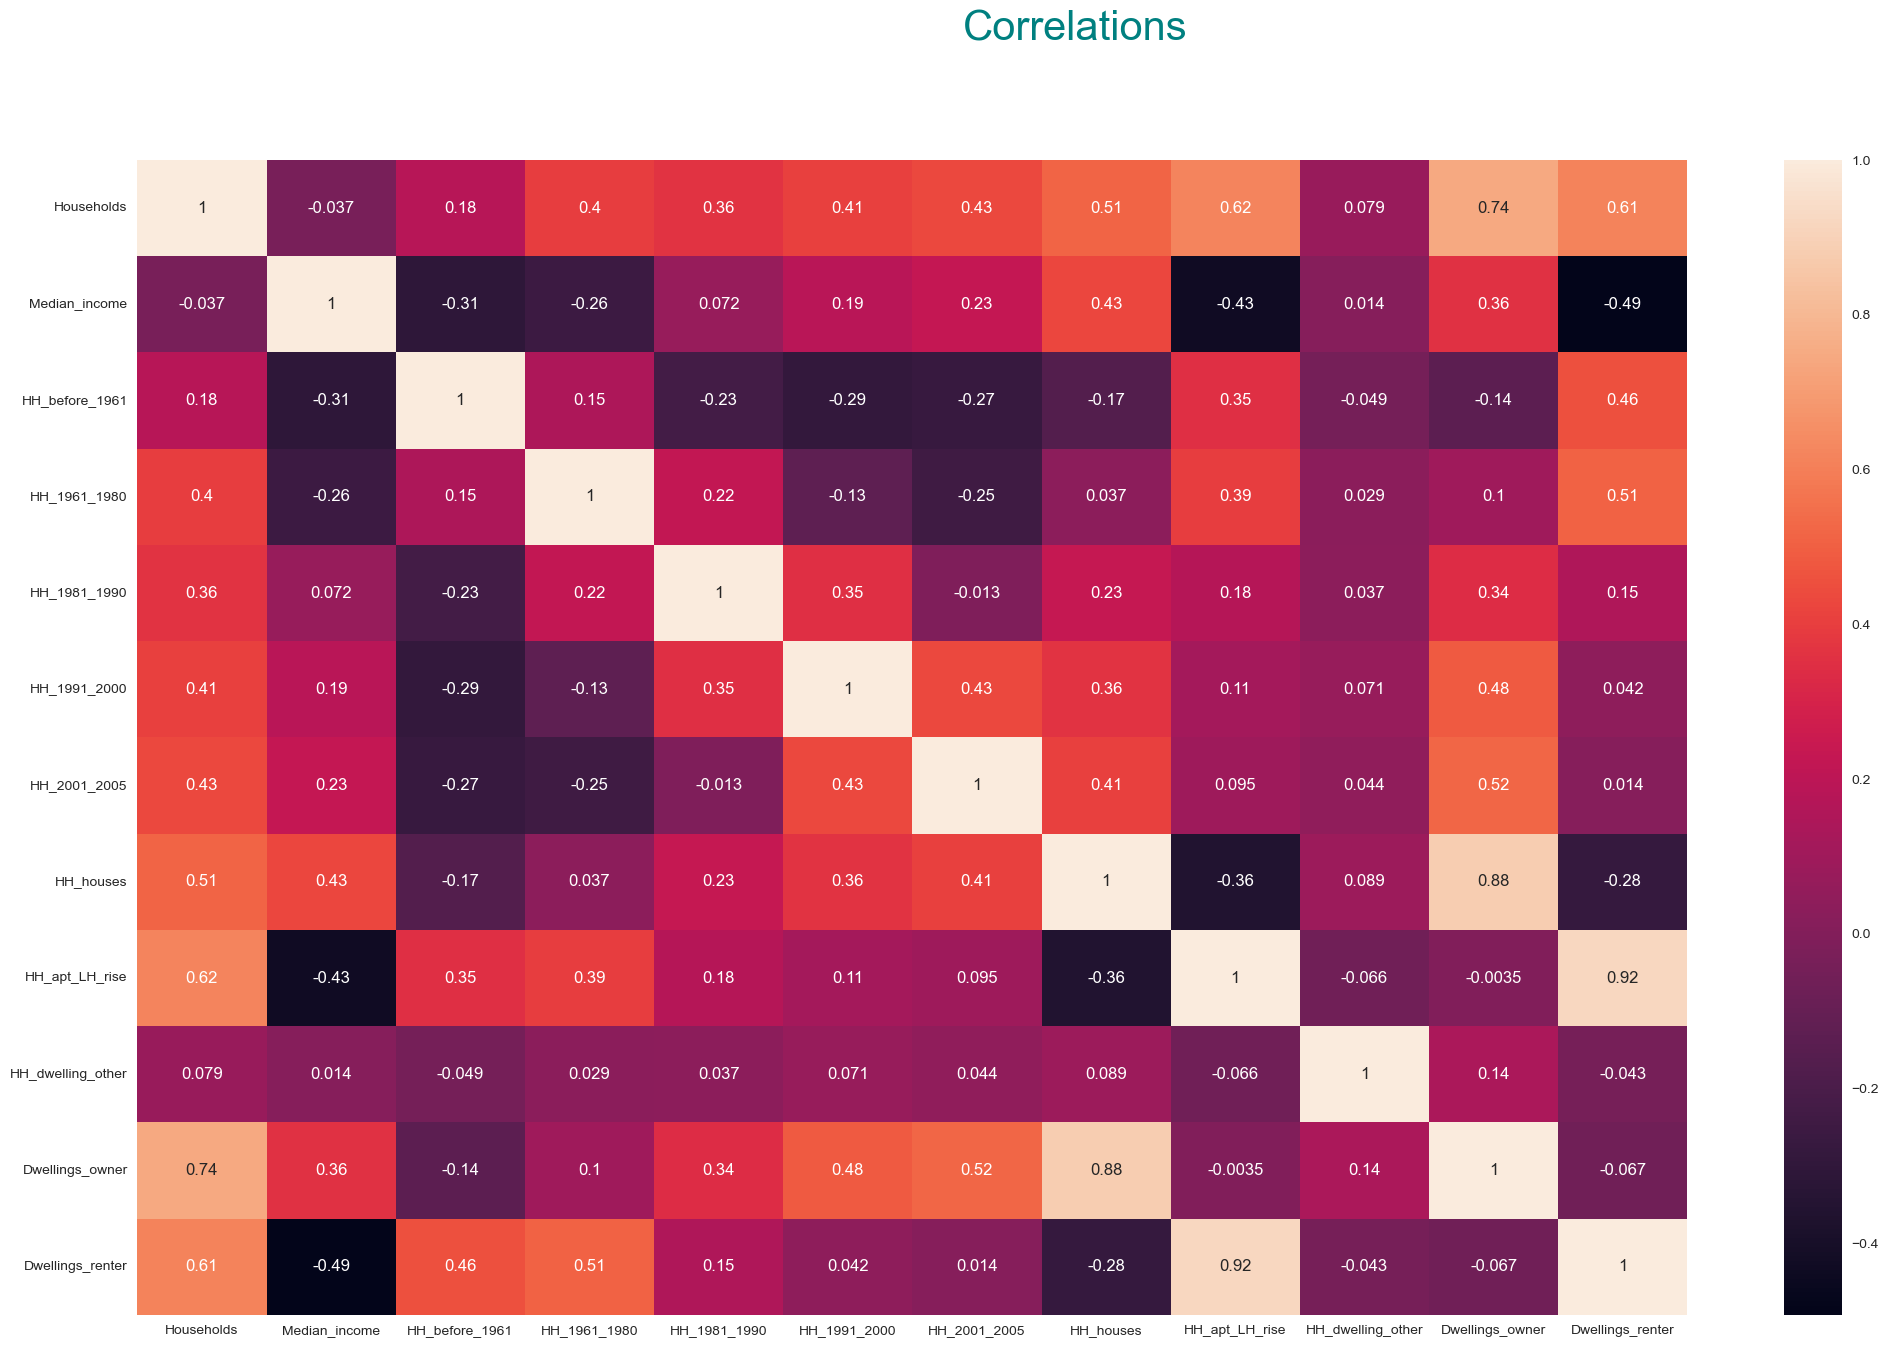

In [86]:
# correlation heatmap
plt.figure(figsize=(25, 15))
plt.suptitle('Correlations', fontsize = 30, color= 'teal')
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [87]:
df.columns

Index(['Households', 'Median_income', 'HH_before_1961', 'HH_1961_1980',
       'HH_1981_1990', 'HH_1991_2000', 'HH_2001_2005', 'HH_houses',
       'HH_apt_LH_rise', 'HH_dwelling_other', 'Dwellings_owner',
       'Dwellings_renter'],
      dtype='object')

In [89]:
df_x = df[[ 'Households', 'HH_before_1961',
       'HH_1961_1980', 'HH_1981_1990', 'HH_1991_2000', 'HH_2001_2005',
       'HH_houses', 'HH_apt_LH_rise', 'HH_dwelling_other', 'Dwellings_owner',
       'Dwellings_renter']].copy(deep=True)
df_y = df[['Median_income']].copy(deep=True)

In [ ]:
df.info()

# 3. Clustering

In [93]:
# Scaling
kmeans_scaler = StandardScaler()
kmeans_scaler.fit(df)
scaled_df = kmeans_scaler.transform(df)
scaled_df = df

In [94]:
# scaling df
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df.columns
scaled_df.head()

,Households,Median_income,HH_before_1961,HH_1961_1980,HH_1981_1990,HH_1991_2000,HH_2001_2005,HH_houses,HH_apt_LH_rise,HH_dwelling_other,Dwellings_owner,Dwellings_renter
0,1441,68242.12,323,199,53,182,526,911,525,5,919,424
1,1026,88172.37,927,70,15,3,0,792,230,4,778,213
2,2071,103853.38,3,607,567,651,106,1418,652,1,1522,381
3,2203,82796.63,133,1695,248,79,0,1397,806,0,1272,807
4,1419,91648.22,0,7,127,938,143,914,505,0,1186,162


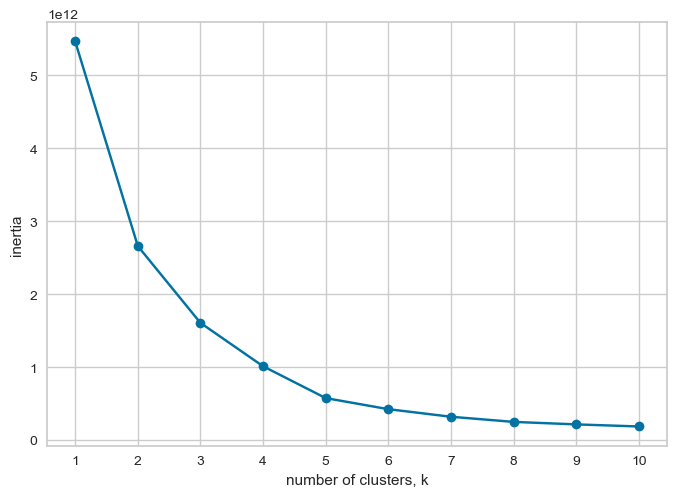

In [95]:
# visualize inertias

ks = range(1,11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(scaled_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


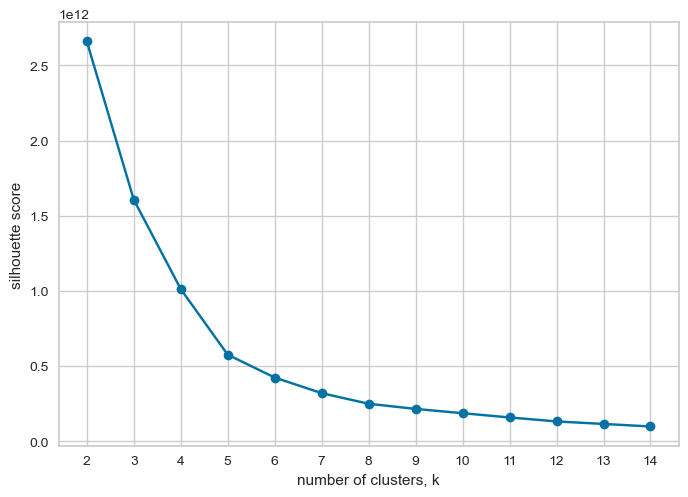

In [96]:
# visualize silhouette_score

ks = range(2,15)
silhouette_score_list = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit_predict(scaled_df)
    
    # Append the inertia to the list of inertias
    s_score = silhouette_score(scaled_df, model.labels_, metric='euclidean')
    silhouette_score_list.append(model.inertia_)
    
    
# Plot ks vs inertias
plt.plot(ks, silhouette_score_list, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()

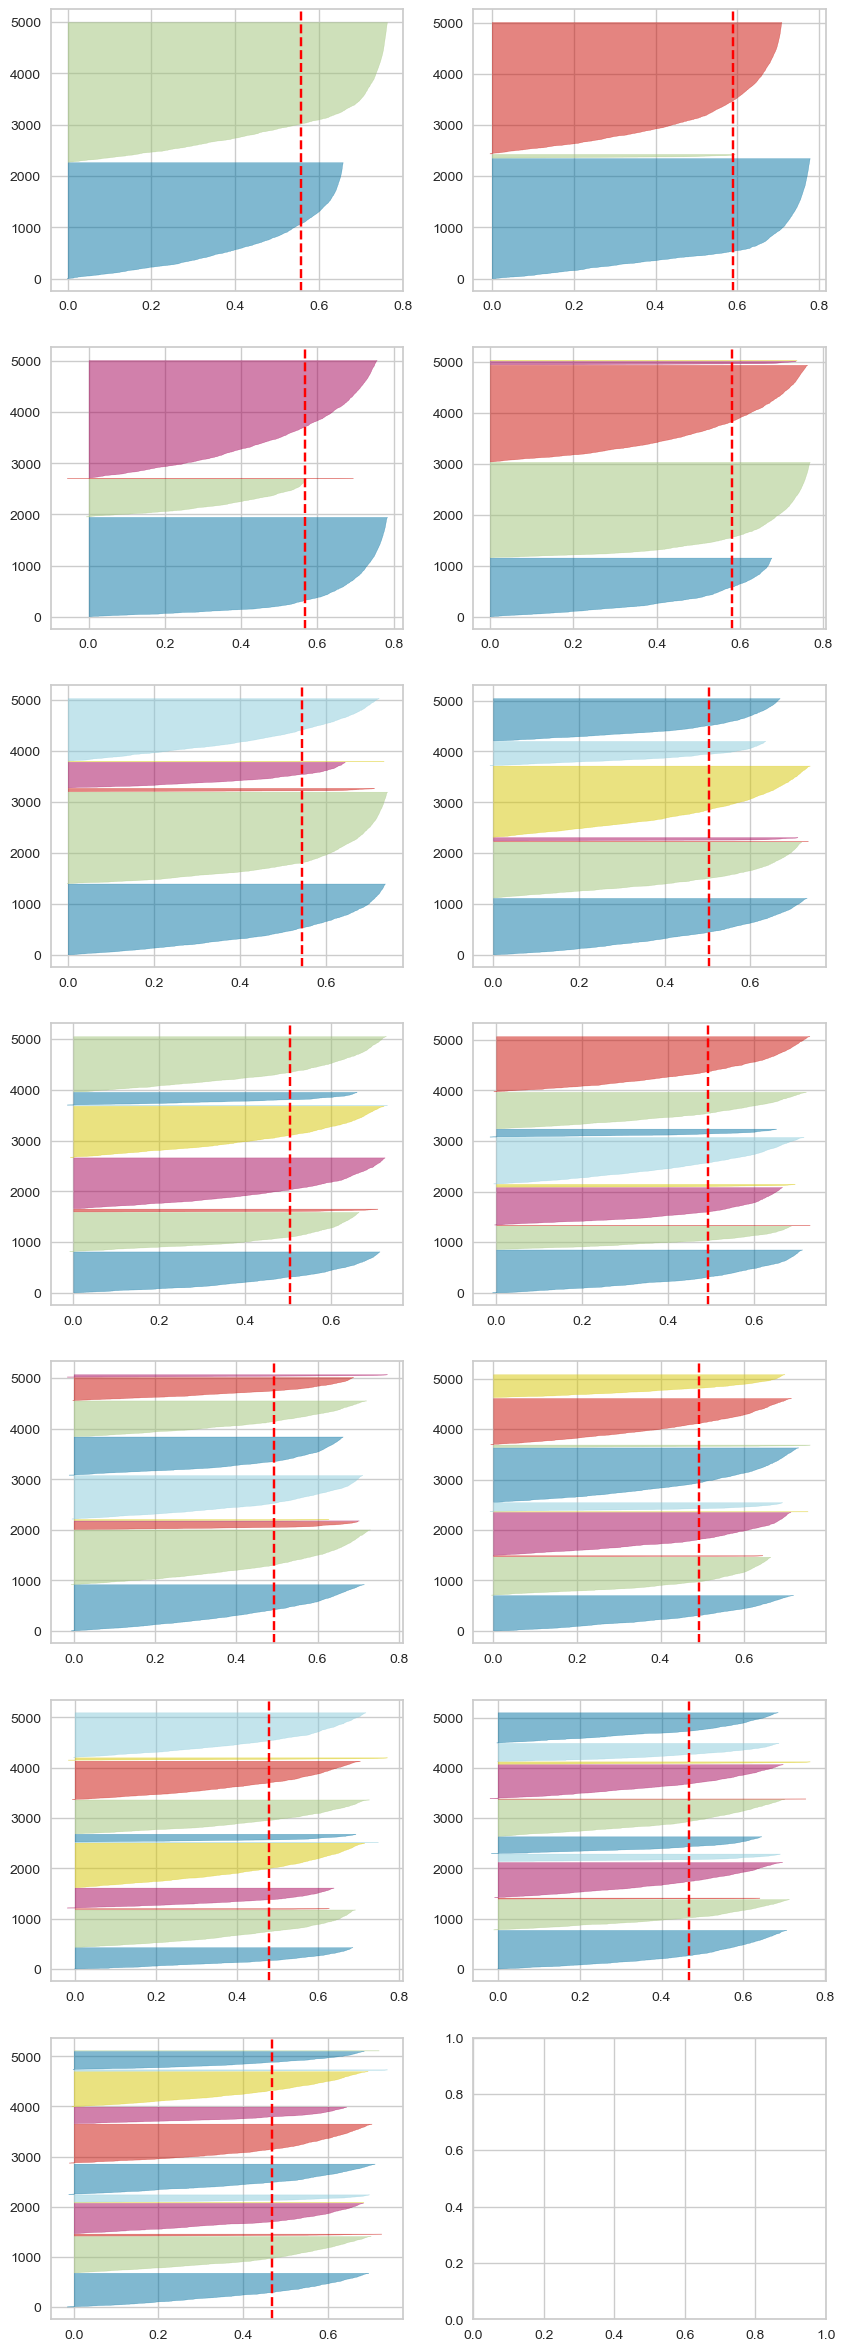

In [97]:
# visualize silhouette_sample_score, k=4 is selected

fig, ax = plt.subplots(7, 2, figsize=(10,30))
for k in range(2,15):

    km = KMeans(n_clusters=k)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_df) 

In [99]:
# k=4 is selected
seed = 84
np.random.seed(seed)

model = KMeans(n_clusters = 5)

# Fit model to scaled_df
model.fit_predict(scaled_df)

df['Cluster'] = model.labels_

In [100]:
model.labels_

array([4, 4, 1, ..., 4, 0, 1])

In [101]:
df.columns

Index(['Households', 'Median_income', 'HH_before_1961', 'HH_1961_1980',
       'HH_1981_1990', 'HH_1991_2000', 'HH_2001_2005', 'HH_houses',
       'HH_apt_LH_rise', 'HH_dwelling_other', 'Dwellings_owner',
       'Dwellings_renter', 'Cluster'],
      dtype='object')

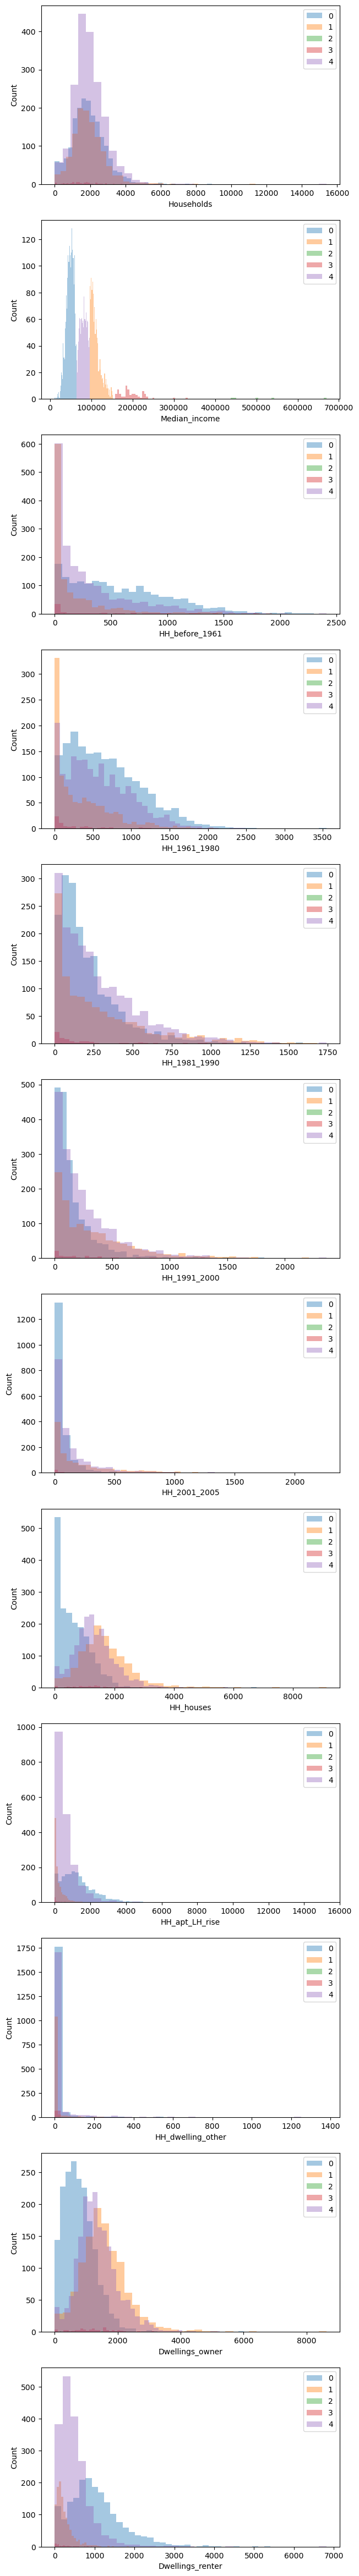

In [102]:
# plot value counts of each numerical column
bins = 35
col_list = list(df.columns)
plt.style.use('default')

fig, axs = plt.subplots(len(col_list)-1, figsize=(7, 60))
# plt.subplots_adjust(hspace=1)
for col in col_list:
    if col != "Cluster":
        for n in range(0,5):
            axs[col_list.index(col)].hist(df[df['Cluster']==n][col], bins=bins, alpha=0.4, 
                                          label=n, density=False)
        axs[col_list.index(col)].legend(loc="upper right")
        axs[col_list.index(col)].set_xlabel(col)
        axs[col_list.index(col)].set_ylabel('Count')
    
fig.show()


In [298]:
df.describe().loc[['mean']]

,Population,Median_income,Avg_HH_size,Pctg_before_1961,Pctg_1961_1980,Pctg_1981_1990,Pctg_1991_2000,Pctg_2001_2005,Pctg_house,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_owner,Pctg_renter,Cluster
mean,4886.455622,77551.276643,2.577107,0.222224,0.29689,0.138035,0.123252,0.066422,0.617409,0.371779,0.010813,0.057458,0.660558,0.333213,1.386345


In [306]:

mean_summary = df.describe().loc[['mean']]

for n in range(0,4):
    index = pd.Index([n])
    temp = df[df['Cluster']==n].describe().loc[['mean']].set_index(index)
    mean_summary = pd.concat([mean_summary, temp])

In [307]:
mean_summary

,Population,Median_income,Avg_HH_size,Pctg_before_1961,Pctg_1961_1980,Pctg_1981_1990,Pctg_1991_2000,Pctg_2001_2005,Pctg_house,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_owner,Pctg_renter,Cluster
mean,4886.455622,77551.276643,2.577107,0.222224,0.296890,0.138035,0.123252,0.066422,0.617409,0.371779,0.010813,0.057458,0.660558,0.333213,1.386345
0,4187.251794,80479.088882,2.574458,0.295585,0.410182,0.094299,0.066036,0.030376,0.757781,0.234389,0.007830,0.048156,0.739862,0.256571,0.000000
1,7313.719677,107696.623935,3.157265,0.031420,0.064009,0.069903,0.250059,0.223288,0.837079,0.156602,0.006319,0.082086,0.851607,0.140350,1.000000
2,4486.636068,49835.618418,2.142491,0.342239,0.318698,0.104600,0.076686,0.035233,0.228957,0.764303,0.006740,0.062246,0.371564,0.626212,2.000000
3,4869.136893,92413.510893,2.811597,0.061614,0.248225,0.307975,0.194224,0.058440,0.810578,0.164457,0.024965,0.047676,0.825160,0.159627,3.000000
